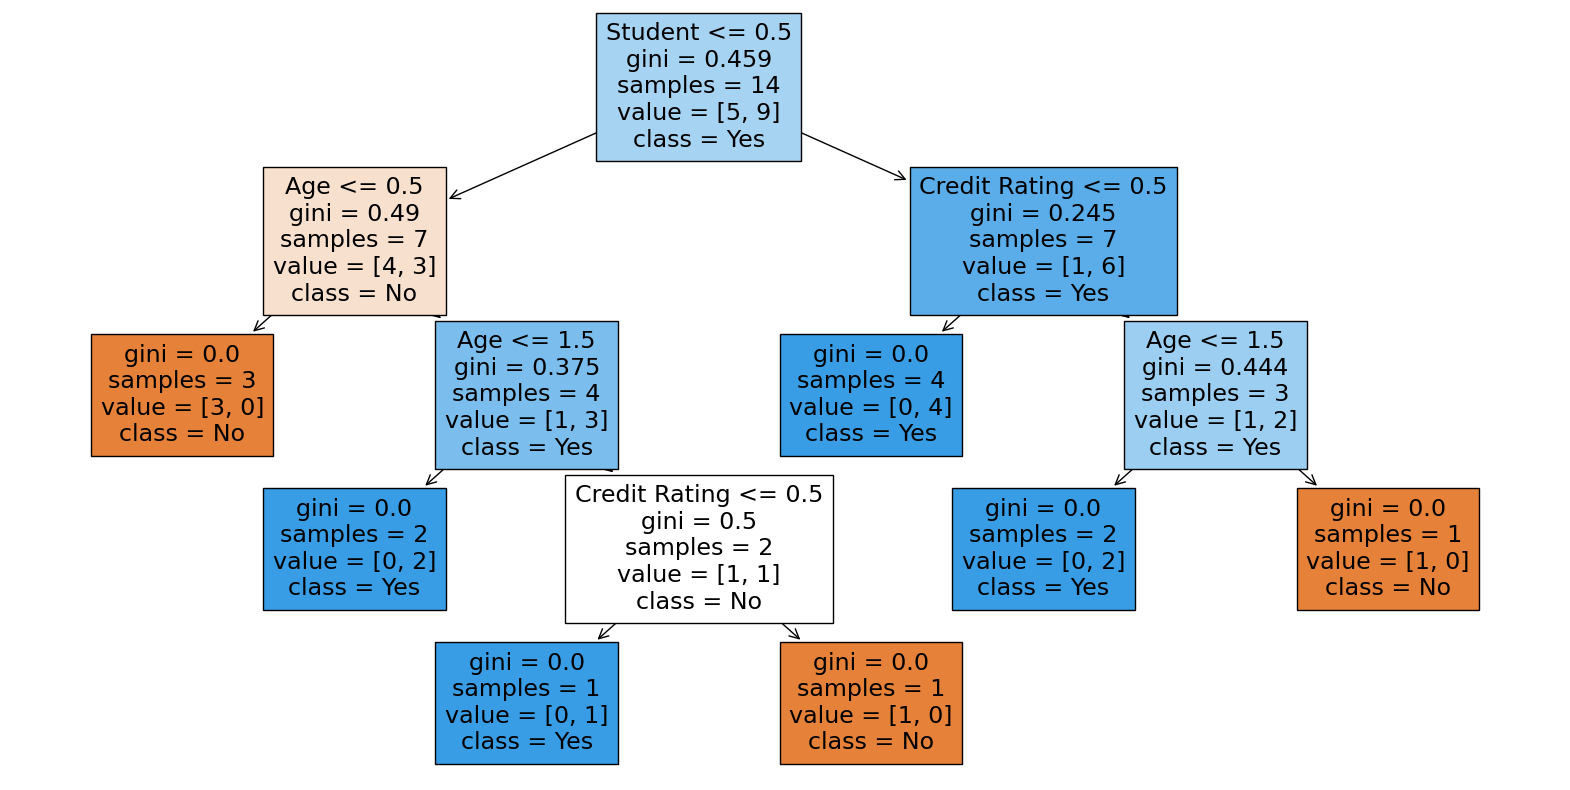

Decision tree splits and Gini impurities:
Node 0 (Gini: 0.4592): split on feature 'Student'
Node 1 (Gini: 0.4898): split on feature 'Age'
Node 2 (Gini: 0.0000): leaf node
Node 3 (Gini: 0.3750): split on feature 'Age'
Node 4 (Gini: 0.0000): leaf node
Node 5 (Gini: 0.5000): split on feature 'Credit Rating'
Node 6 (Gini: 0.0000): leaf node
Node 7 (Gini: 0.0000): leaf node
Node 8 (Gini: 0.2449): split on feature 'Credit Rating'
Node 9 (Gini: 0.0000): leaf node
Node 10 (Gini: 0.4444): split on feature 'Age'
Node 11 (Gini: 0.0000): leaf node
Node 12 (Gini: 0.0000): leaf node
Prediction for sklearn decision tree: Yes
Gayatri Kularni -53004230002


C:\Users\Gayatri kulkarni\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree as sk_tree

# Step 1: Parse the dataset
data = {
    'Age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'Income': ['High', 'High', 'High', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium'],
    'Student': ['No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No'],
    'Credit Rating': ['Fair', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Fair', 'Fair', 'Excellent', 'Excellent', 'Fair', 'Excellent'],
    'Buys Computer': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

# Encode the categorical variables
df_encoded = df.apply(lambda x: pd.factorize(x)[0])

# Fit the decision tree classifier using Gini impurity
clf_gini = sk_tree.DecisionTreeClassifier(criterion='gini')
clf_gini = clf_gini.fit(df_encoded.iloc[:, :-1], df_encoded['Buys Computer'])

# Convert the feature names from Index to list
feature_names = df.columns[:-1].tolist()

# Convert the class names to a list
class_names = df['Buys Computer'].unique().tolist()

# Plot the decision tree
plt.figure(figsize=(20,10))
sk_tree.plot_tree(clf_gini, feature_names=feature_names, class_names=class_names, filled=True)
plt.show()

# Function to print Gini impurity and chosen attribute at each split
def print_gini_and_splits(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != sk_tree._tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    print("Decision tree splits and Gini impurities:")
    for i in range(tree_.node_count):
        if tree_.children_left[i] != sk_tree._tree.TREE_LEAF:
            print(f"Node {i} (Gini: {tree_.impurity[i]:.4f}): split on feature '{feature_name[i]}'")
        else:
            print(f"Node {i} (Gini: {tree_.impurity[i]:.4f}): leaf node")

print_gini_and_splits(clf_gini, feature_names)

# Example test sample
test_sample = {
    'Age': '<=30',
    'Income': 'Medium',
    'Student': 'Yes',
    'Credit Rating': 'Fair'
}

# Encode the test sample
encoded_sample = pd.DataFrame([test_sample]).apply(lambda x: pd.factorize(df[x.name])[0][df[x.name].tolist().index(x[0])])

# Predict using sklearn decision tree
sklearn_prediction = clf_gini.predict([encoded_sample])
decoded_prediction = pd.factorize(df['Buys Computer'])[1][sklearn_prediction[0]]
print("Prediction for sklearn decision tree:", decoded_prediction)
print("Gayatri Kularni -53004230002")


ModuleNotFoundError: No module named 'pgmpy'